### Q1. **What is the mathematical formula for a linear SVM?**

The mathematical formula for a **linear SVM** aims to find the optimal hyperplane that separates two classes. The decision boundary (hyperplane) is given by:


w .x + b = 0

Where:
- \( w \) is the weight vector (perpendicular to the hyperplane).
- \( x \) is the feature vector (data point).
- \( b \) is the bias term (offset from origin).

The decision function is:


f(x) = sign(w . x + b)


For a correct classification, the constraints are:


y_i (w . x_i + b) >=1 ∀i


Where
y_i ∈ {−1,+1} are the class labels

---

### Q2. **What is the objective function of a linear SVM?**

The objective of linear SVM is to maximize the margin (the distance between the closest data points from each class and the hyperplane). The margin is inversely proportional to ||w||, so we aim to minimize ||w||^2.

The **objective function** for a linear SVM is:


min_{w,b} 1/2 ||w||^2
    

Subject to the constraints:


y_i(w . x_i + b) >=1 ∀i


The goal is to minimize 1/2 ||w||^2 , which maximizes the margin between the two classes.

---

### Q3. **What is the kernel trick in SVM?**

The **kernel trick** in SVM allows the algorithm to classify data that is **not linearly separable** by projecting the data into a higher-dimensional space where it becomes linearly separable.

The kernel function ( K(x_i, x_j) ) computes the dot product of the data points in this higher-dimensional space without explicitly computing the transformation. This makes the computation efficient.

Common kernel functions include:
- **Linear kernel**: \( K(x_i, x_j) = x_i . x_j \)
- **Polynomial kernel**: \( K(x_i, x_j) = (x_i .t x_j + 1)^d \)
- **RBF (Radial Basis Function) kernel**: \( K(x_i, x_j) = exp(−γ \|x_i - x_j\|^2) \)

---

### Q4. **What is the role of support vectors in SVM? Explain with an example.**

**Support vectors** are the data points that lie closest to the decision boundary (hyperplane). They are the most critical points for defining the position of the hyperplane because the margin is determined by these points. Any point that is farther from the hyperplane does not affect the decision boundary.

- **Example**: 
  Imagine two classes of points in a 2D space (Class 1: blue, Class 2: red). The SVM finds a hyperplane to separate these two classes. The points that are nearest to the hyperplane from both classes are called **support vectors**, and they define the margin of separation.

Without these support vectors, the hyperplane might shift, which would lead to a different decision boundary.

---

### Q5. **Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM?**

Let's break down the terms with illustrations:

1. **Hyperplane**: 
   - The hyperplane is the decision boundary that separates the two classes. In a 2D space, it is a straight line, while in higher dimensions, it's a plane.
   
   - **Equation**: \( w . x + b = 0 \)

2. **Marginal Planes**: 
   - The marginal planes are parallel to the hyperplane and run through the support vectors. The margin is the distance between these two planes.
   
   - **Equations**: \( w . x + b = 1 \) and \( w . x + b = -1 \)

3. **Hard Margin**:
   - Hard margin SVM assumes that the data is perfectly linearly separable and tries to find a hyperplane with no misclassified points.
   
4. **Soft Margin**:
   - Soft margin SVM allows for some misclassifications and tries to balance margin maximization with minimizing classification errors. Slack variables \( xi \) are introduced to allow points inside the margin or on the wrong side of the hyperplane.

### Q6. SVM Implementation through Iris dataset.


- Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.
  
- Train a linear SVM classifier on the training set and predict the labels for the testing set.
  
- Compute the accuracy of the model on the testing set.
  
- Plot the decision boundaries of the trained model using two of the features.
  
- Try different values of the regularisation parameter C and see how it affects the performance of the model
  
- Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [2]:
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Train a linear SVM classifier
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Predict the labels for the testing set
y_pred = model.predict(X_test)

In [7]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.00%


In [8]:
# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

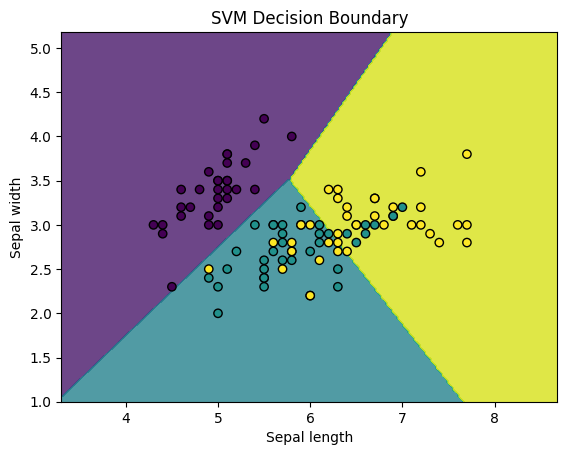

In [9]:
# Plot the decision boundary for the trained model
plot_decision_boundaries(X_train, y_train, model)

In [10]:
# Try different values of the regularisation parameter C
for C_value in [0.01, 0.1, 1, 10, 100]:
    model = SVC(kernel='linear', C=C_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with C={C_value}: {accuracy * 100:.2f}%')

Accuracy with C=0.01: 40.00%
Accuracy with C=0.1: 82.22%
Accuracy with C=1: 80.00%
Accuracy with C=10: 80.00%
Accuracy with C=100: 80.00%


In [11]:
# Bonus task: Implement linear SVM classifier from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# Train the linear SVM from scratch
X_train_scratch, X_test_scratch, y_train_scratch, y_test_scratch = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_scratch = np.where(y_train_scratch == 0, -1, 1)
y_test_scratch = np.where(y_test_scratch == 0, -1, 1)

svm_scratch = LinearSVM()
svm_scratch.fit(X_train_scratch, y_train_scratch)
predictions_scratch = svm_scratch.predict(X_test_scratch)

# Compute accuracy for the scratch implementation
accuracy_scratch = np.mean(predictions_scratch == y_test_scratch)
print(f"Accuracy from scratch implementation: {accuracy_scratch * 100:.2f}%")

Accuracy from scratch implementation: 100.00%
